# Aviation Accident Analysis

## Data Loading


In [128]:
# Importing standard library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
df = pd.read_csv('aviation-accident-data-2023-05-16.csv')
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
# checking the type of the datset
type(df)

pandas.core.frame.DataFrame

In [ ]:
# displays information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


## Check and remove duplicated values

In [ ]:
# checks the first 20 duplicated values
df[df.duplicated()].head(20)

,date,type,registration,operator,fatalities,location,country,cat,year
542,13-APR-1940,Junkers Ju-52/3m,NaN,German AF,NaN,"Gangsoya, Sogn o...",Norway,A1,1940
560,29-APR-1940,Junkers Ju-52/3m,NaN,German AF,0,Oslo-Fornebu Air...,Norway,A1,1940
568,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
577,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
579,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
580,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
581,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
582,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940
584,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,Waalhaven,Netherlands,A1,1940
585,10-MAY-1940,Junkers Ju-52/3m,NaN,German AF,NaN,near Den Haag,Netherlands,A1,1940


In [ ]:
# this checks the number of duplicated values(True) and non-duplicates(False)
df.duplicated().value_counts()

False    23852
True       115
Name: count, dtype: int64

In [ ]:
# Dropping all duplicated values
df = df.drop_duplicates()

In [ ]:
# confirming all duplicates have been dropped
df.duplicated().value_counts()

False    23852
Name: count, dtype: int64

#### Check for missing values

In [ ]:
# Displays all columns and which of them have missing values.
df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

### Check the present values percentage

In this section, we are checking for the percentage of present values in each column, so that we can determine if they could be filled or they are to be dropped.

In [77]:
percentage_registration = 22419/23967 * 100
percentage_registration

93.54111903867818

In [78]:
percentage_operator = 23963/23967 * 100
percentage_operator

99.98331038511287

In [79]:
percentage_fatalities = 20029/23967 * 100
percentage_fatalities

83.56907414361415

In [80]:
percentage_location = 23019/23967 * 100
percentage_location

96.04456127174865

In [81]:
df['fatalities'].value_counts()

fatalities
0      14632
2       1140
1       1023
3        995
4        892
       ...  
134        1
256        1
290        1
259        1
224        1
Name: count, Length: 197, dtype: int64

In [82]:
# converting strings to numbers
def stringtonum(x):
    if pd.isna(x):
        return None
    x = str(x)
    if '+' in x:
        return int(x.split('+')[0])
    else:
        return int(float(x))

In [83]:
df['fatalities'] = df['fatalities'].apply(stringtonum)

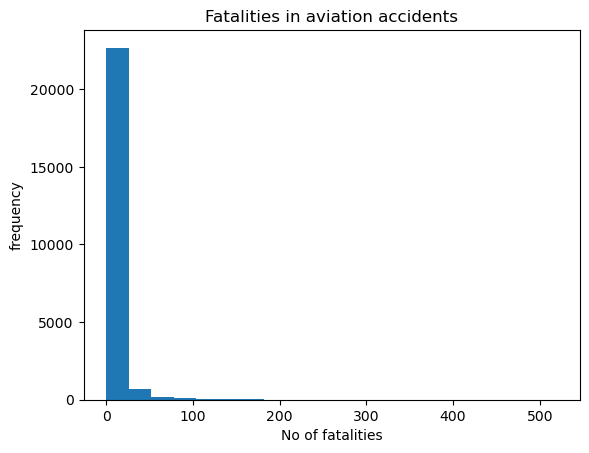

In [ ]:
# fatalities histogram to check if it is symmetrical or skewed
plt.hist(df['fatalities'], bins=20)
plt.title('Fatalities in aviation accidents')
plt.xlabel('No of fatalities')
plt.ylabel('frequency')
plt.show()

In [ ]:
# Displays unique items in the fatalities column
df['fatalities'].value_counts()

fatalities
0      14632
2       1140
1       1023
3        995
4        892
       ...  
134        1
256        1
290        1
259        1
224        1
Name: count, Length: 197, dtype: int64

In [ ]:
# calculates and stores the median in the fatalities_median variable
fatalities_median = df['fatalities'].median()
fatalities_median

0.0

In [ ]:
# replaces all missing values with the median value
df['fatalities'] = df['fatalities'].fillna(fatalities_median)

In [ ]:
# confirms that fatalities has been filled.
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [ ]:
# Displays all unique values in the registration column
df['registration'].value_counts()

registration
LZ-...     1447
-            11
unreg.        6
39            5
48            4
           ... 
52-5881       1
HJ250         1
11073         1
45-879        1
D-CGFQ        1
Name: count, Length: 21962, dtype: int64

In [ ]:
# calculates and stores the mode in reg_mode variable
reg_mode = df['registration'].mode()[0]
reg_mode

'LZ-...'

In [ ]:
# replaces all missing values with the mode
df['registration'] = df['registration'].fillna(reg_mode)

In [ ]:
# confirms the missing values have been filled
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [ ]:
# displays unique values in the location column
df['location'].value_counts()

location
unknown                1204
Havana-JosÃ© Mar...     105
Miami Internatio...      71
Beirut Internati...      48
New York-John F....      44
                       ... 
near Damroh               1
Puerto Columbia           1
Moskva-Khodynka ...       1
near Byelaya Noch         1
Hohn Air Base             1
Name: count, Length: 14608, dtype: int64

In [ ]:
# calculates and stores the mode in the location_mode variable
location_mode = df['location'].mode()[0]
location_mode

'unknown'

In [ ]:
# replaces the missing values with the mode
df['location'] = df['location'].fillna(location_mode)

In [ ]:
# confirms missing values are filled
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [ ]:
# displays unique values in the operator column
df['operator'].value_counts()

operator
USAAF                          2608
USAF                           1118
RAF                             920
US Navy                         745
German AF                       411
                               ... 
BAFIN                             1
Dow Chemical Company              1
Aero Bellavista                   1
Pacific Missionary Aviation       1
Bar Aviation                      1
Name: count, Length: 6017, dtype: int64

In [ ]:
# calculates and stores the mode in the operator_mode variable
operator_mode = df['operator'].mode()[0]
operator_mode

'USAAF'

In [ ]:
# fills the missing values with the mode
df['operator'] = df['operator'].fillna(operator_mode)

In [ ]:
# confirms all missing values have been replaced
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [ ]:
# saves the clean dataset.
df.to_csv('clean-aviation-accident-data.csv', index=False)

# Data Analysis

This analysis tells us which aircraft type has the highest fatality rate. By identifying this, this report gives the company the necessary data for the company to make the safest decision that will benefit both the comapny and he clients.

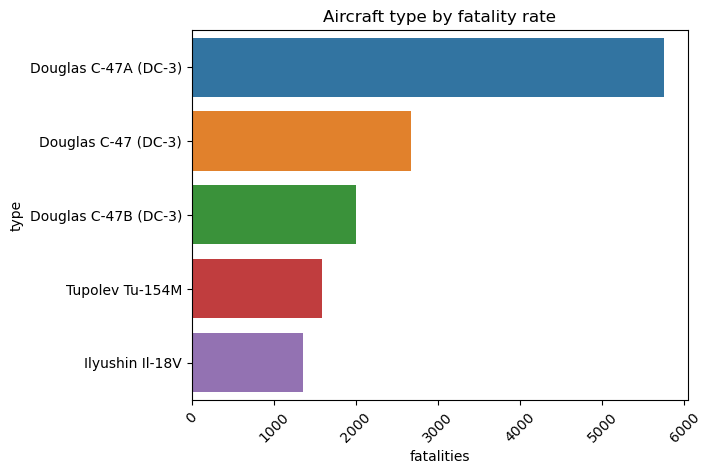

In [ ]:
# groups all fatalities by aircraft type and sums all fatalities for each type
aircrafttype_accidents= df.groupby('type')['fatalities'].sum().reset_index()
low_accident = aircrafttype_accidents.sort_values(by='fatalities', ascending=False).head()


# use seaborn to plot 
sns.barplot(
    x = 'fatalities',
    y = 'type',
    data= low_accident
)
plt.title('Aircraft type by fatality rate')
plt.xticks(rotation = 45)
plt.show()